In [3]:
# Tell Jupyter where to find the code
import os, sys
sys.path.append(os.environ['CODE']) #CODE is defined in the conda environment "Notes"

# Import required packages
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d # 3D plotting
plt.style.use('notebook')

import graphene
import fundamental_constants as fc

<a class='anchor' id='toc'/>

[1. Dirac Fermions and Band Structure](#dirac-fermions)

[2. Density of States](#dos)

[3. Carrier Density](#carrier-density)

[4. Mobility](#scattering)

&ensp;[a. Basics](#mobility-basics)


# 1. Dirac Fermions and Band Structure<a class='anchor' id='dirac-fermions'/>

[top](#toc)

The charge carriers that move through graphene are known as "Dirac Fermions". They are the collective motion of all electrons interfering with one another in such a way that they can be described as quasiparticles with a linear dispersion relation at low energies.


$$
\epsilon = \pm\hbar v_F|k|
$$

where $k=k_x+ik_y$ is the in-plane momentum. This is the result of taking the eigenvalues of the Dirac Fermion Hamiltonian

$$
H = \hbar v_F(\sigma_x k_x + \sigma_y k_y)=\hbar v_F \left(\begin{array}{} 0 & k^* \\ k & 0\end{array}\right)
$$

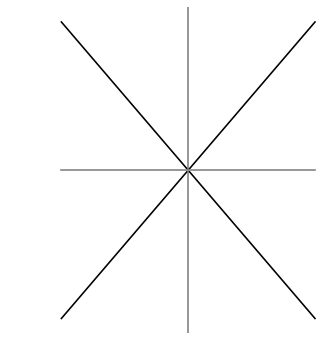

In [3]:
mlg = Graphene.Monolayer()
eF = 0.4*fc.e_proton
kF = mlg.kFermi(eF,model='LowEnergy')
k = np.linspace(-2*kF,2*kF,num=100)

conduction_band = mlg.DiracFermionDispersion(k,model='LowEnergy')
valence_band = -conduction_band

fig, ax = plt.subplots(figsize=(5,6))
ax.plot(k/kF,conduction_band/eF,'k')
ax.plot(k/kF,valence_band/eF, 'k')
ax.plot(k/kF,np.zeros_like(k),color='gray')
ax.axvline(x=0,ymin=0,ymax=1,color='gray')
ax.set_axis_off()
plt.show;

At higher energies, this linear dispersion fails and the full tight-binding model is required. This gives a dispersion relation that is dependent on the direction of $\mathbf k$

$$
\epsilon = \pm t\sqrt{3+f(\mathbf k)}-t'f(\mathbf k) \\
$$

$$
f(\mathbf k) =  2\cos(\sqrt{3}k_y a) + 4\cos(\frac{\sqrt{3}}{2}k_y a)\cos\left(\frac{3}{2}k_x a\right)
$$

[Castro Neto et al. 2009, Section IIa](https://arxiv.org/abs/0709.1163)

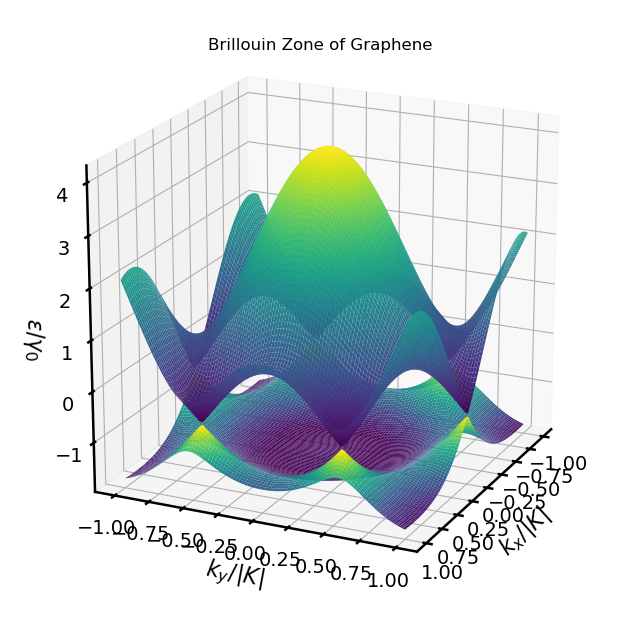

In [7]:
mlg = graphene.Monolayer()
mlg.g0prime = -0.2*mlg.g0
kmax = np.abs(mlg.K)
emax = mlg.DiracFermionDispersion(0,model='FullTightBinding')
kx = np.linspace(-kmax,kmax,num=100)
ky = np.copy(kx)

# k is relative to K. Add K to move to center of Brillouin zone
k = (kx + 1j*ky[:,np.newaxis]) + mlg.K

conduction_band = mlg.DiracFermionDispersion(k,model='FullTightBinding',eh=1)
valence_band = mlg.DiracFermionDispersion(k,model='FullTightBinding',eh=-1)

fig = plt.figure(figsize=(8,8))
fullax = plt.axes(projection='3d')
fullax.view_init(20,25)
KX, KY = np.meshgrid(kx,ky)
fullax.plot_surface(KX/kmax,KY/kmax,conduction_band/mlg.g0,
                rstride=1,cstride=1,cmap='viridis',edgecolor='none')
fullax.plot_surface(KX/kmax,KY/kmax,valence_band/mlg.g0,
                rstride=1,cstride=1,cmap='viridis',edgecolor='none')

fullax.set_xlabel('$k_x/|K|$')
fullax.set_ylabel('$k_y/|K|$')
fullax.set_zlabel('$\epsilon/\gamma_0$')
fullax.set_title('Brillouin Zone of Graphene')

plt.show()

<img src='images/castroneto-electronic-2009-fig3.png' width='400px' />

Without any particle-hole asymmetry:

In [11]:
mlg = Graphene.Monolayer()
kmax = np.abs(mlg.K)
emax = mlg.DiracFermionDispersion(0,model='FullTightBinding')
kx = np.linspace(-kmax,kmax,num=100)
ky = np.copy(kx)

# k is relative to K. Add K to move to center of Brillouin zone
k = (kx + 1j*ky[:,np.newaxis]) + mlg.K

conduction_band = mlg.DiracFermionDispersion(k,model='FullTightBinding',eh=1)
valence_band = mlg.DiracFermionDispersion(k,model='FullTightBinding',eh=-1)

fig = plt.figure(figsize=(8,8))
fullax = plt.axes(projection='3d')
fullax.view_init(20,35)
KX, KY = np.meshgrid(kx,ky)
fullax.plot_surface(KX/kmax,KY/kmax,conduction_band/mlg.g0,
                rstride=1,cstride=1,cmap='viridis',edgecolor='none')
fullax.plot_surface(KX/kmax,KY/kmax,valence_band/mlg.g0,
                rstride=1,cstride=1,cmap='viridis',edgecolor='none')

fullax.set_xlabel('$k_x/|K|$')
fullax.set_ylabel('$k_y/|K|$')
fullax.set_zlabel('$\epsilon/\gamma_0$')
fullax.set_title('Brillouin Zone of Graphene')

plt.show()

NameError: name 'Graphene' is not defined

# 2. Density of States <a class='anchor' id='dos' />

[top](#toc)

In the `LowEnergy` approximation, the density of states of graphene *per unit area* (DOS) is given by ...
An expression for the DOS in graphene with the full tight-binding model description (assuming no electron hole asymmetry) is given in [Castro Neto et al. 2009](https://arxiv.org/abs/0709.1163)

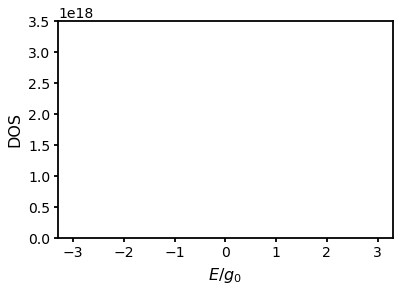

In [6]:
mlg = Graphene.Monolayer()

E = np.linspace(-3,3,num=200) * mlg.g0
DOS_low = mlg.DensityOfStates(E,model='LowEnergy')
DOS_full = mlg.DensityOfStates(E,model='FullTightBinding')

plt.plot(E/mlg.g0,DOS_full)
plt.plot(E/mlg.g0,DOS_low)
plt.xlabel('$E/g_0$')
plt.ylabel('DOS')
plt.ylim(0,3.5e18)
plt.show()

<img src='images/castroneto-electronic-2009-fig5.png' width='400px'/>

# 3. Carrier Density <a class='anchor' id='carrier-density'/>

[top](#toc)

We can obtain the carrier density $n=n_- - n_+$ from an integral over the density of states

$$
n(\mu)=\int_{-\infty}^\infty \rho(\epsilon)[f(\epsilon-\mu,T) - f(-\epsilon-\mu,T)]d\epsilon
$$

where the first term accounts for negative carriers and the second term accounts for holes. In reality, we only need to take the integral up to a cutoff $\pm3\gamma_0$, since that is the largest value of energy in the first Brillouin zone.

At zero temperature, and assuming linear band structure, the carrier density of graphene can be calculated by counting the number of states available in a circle of radius $k_F$ around the Dirac point
$$
N = g_sg_v\frac{\pi k_F^2}{(2\pi/L)^2}\implies n=\frac{k_F^2}{\pi}=\frac{(\epsilon_F/\hbar v_F)^2}{\pi}=\frac{\epsilon_F^2}{\hbar^2v_F^2\pi}
$$

First let's verify that `mlg.CarrierDensity(muC,0,'LowEnergy')` returns this value

C:\Users\User\Documents\Research\Notes\code\Graphene.py:205: UserWarning: Monolayer.CarrierDensity has not been verified
  warnings.warn('Monolayer.CarrierDensity has not been verified')


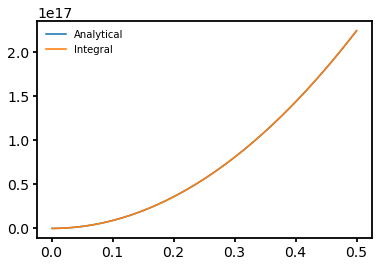

In [7]:
mlg=Graphene.Monolayer()
T=0
eF = np.linspace(1e-3,0.5,num=100) *fc.e_proton

n_analytical = eF**2 / ((fc.hbar*mlg.vF)**2 * fc.pi)
n_integral = mlg.CarrierDensity(eF,0,'LowEnergy')

plt.plot(eF/fc.e_proton,n_analytical,label='Analytical')
plt.plot(eF/fc.e_proton,n_integral,label='Integral')
plt.legend()
plt.show()

Next we compare the `LowEnergy` density of states to the `FullTightBinding` model at different temperatures. We can see that the two models hardly deviate at all.

C:\Users\User\Documents\Research\Notes\code\Graphene.py:212: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integrate.quad(p_hole,-3*self.g0,0,points=(-self.g0,-m))[0]   )


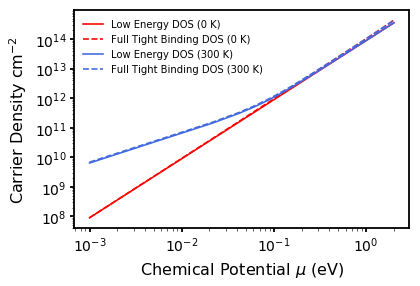

In [8]:
mlg = Graphene.Monolayer()

muC=np.linspace(1e-3,2,num=100)*fc.e_proton
T = 300

n_LE_0    = mlg.CarrierDensity(muC,0,'LowEnergy')
n_FTB_0   = mlg.CarrierDensity(muC,0,'FullTightBinding')
n_LE_300  = mlg.CarrierDensity(muC,T,'LowEnergy')
n_FTB_300 = mlg.CarrierDensity(muC,T,'FullTightBinding')

color0, color300= 'red', 'royalblue'
labLE,labFTB = '-','--'


plt.loglog(muC/fc.e_proton,n_LE_0*1e-4,color=color0,label='Low Energy DOS (0 K)')
plt.loglog(muC/fc.e_proton,n_FTB_0*1e-4,color=color0,linestyle='--',label='Full Tight Binding DOS (0 K)')
plt.loglog(muC/fc.e_proton,n_LE_300*1e-4,color=color300,label='Low Energy DOS (300 K)')
plt.loglog(muC/fc.e_proton,n_FTB_300*1e-4,color=color300,linestyle='--',label='Full Tight Binding DOS (300 K)')
plt.xlabel('Chemical Potential $\mu$ (eV)')
plt.ylabel('Carrier Density cm$^{-2}$')
plt.legend()
plt.show()

We can return the Fermi level from the carrier density.

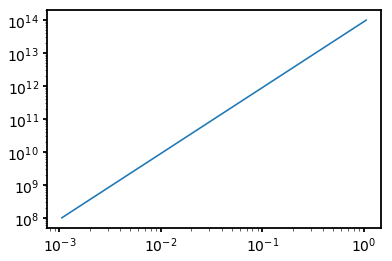

In [9]:
mlg = Graphene.Monolayer()

n = np.logspace(8,14)*1e4 # Convert cm^-2 m^-2
eF = mlg.FermiLevel(n)

plt.loglog(eF/fc.e_proton,n*1e-4);

# 4. Mobility <a class='anchor' id='scattering'/>

[top](#toc)

## a. Basics <a class='anchor' id='mobility-basics'/>

[top](#toc)

From [Jablan 2009](https://link.aps.org/doi/10.1103/PhysRevB.80.245435):

When $\omega<2\epsilon_F/\hbar$ and $\omega<\omega_{Oph}\approx 0.2$ eV, the frequency is low enough that scattering time can be estimated from DC measurements $\tau_{DC}$.

$$
\tau_{DC}=\mu\frac{\hbar\sqrt{n\pi}}{ev_F}=\mu\frac{\epsilon_F}{ev_F^2}
$$

Scattering time can be estimated by inverting the Drude conductivity equation, assuming $\omega\tau\gg 1$

$$
\tau(\omega)=\frac{e^2\epsilon_F}{\pi\hbar\omega^2}\frac{1}{\text{Re}\sigma(\omega,0)}
$$

They find that for $\epsilon_F=0.64$ eV and $\mu=10000$ cm$^2$/V-s, that $\tau=6.4\times 10^{-13}$ s. This matches our value, if we assume that they used $v_F=1\times 10^6$ m/s.

In [8]:
mlg = graphene.Monolayer()
eF=0.64*fc.e_proton
mobility=1

tau = 1/mlg.ScatteringRate(mobility,eF)

print(tau*1e13*(mlg.vF/1e6)**2)

6.400000000000001


In [4]:
mlg = graphene.Monolayer()
eF=0.4*fc.e_proton
mobility=0.5

r = mlg.ScatteringRate(mobility,eF)

print(r/1e12)
print(0.012*fc.e_proton/fc.hbar * 1e-12)

4.105004840921831
18.23120799739436


The original graphene paper by [Geim and Novoselov](http://www.sciencemag.org/cgi/doi/10.1126/science.1102896) found $\mu=10,000$ cm$^2$/V-s, which yields
$$
\tau =\frac{(1 \text{m}^2/\text{V-s})}{(1\text{eV/V})(1\times 10^6 \text{m/s})^2}E_F=(10^{-12}\text{s/eV})E_F
$$
High quality graphene has $\tau\approx 0.5$ ps [Woessner](https://www.nature.com/articles/nmat4169).

Typical Mobility values as tabulated in [Cooper et al. 2011](http://arxiv.org/abs/1110.6557)

<img src='images/cooper-experimental-2011-Table3.png'/>

Mobility is not quite independent of Fermi level, but we can estimate for now that it is.

## b. Temperature-Dependence

[Shiue et al. 2019](http://www.nature.com/articles/s41467-018-08047-3) use a temperature-dependent mobility based a drift velocity-field relation (they cite 3 papers on pg. 4). At an electron temperature $T_e$, the mobility is

$$
\mu(T_e)=\mu_0\left(\frac{T_0}{T_e}\right)^\beta,\qquad \beta=2.3
$$

where $T_0$ is the temperature at which $\mu_0$ was measured. 

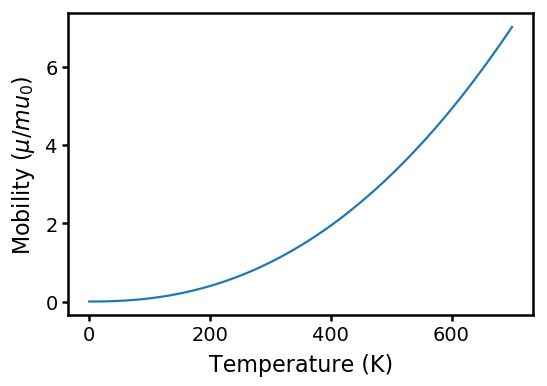

In [10]:
mobility = (10000,300)
mlg = graphene.Monolayer(mobility)

T = np.linspace(1,700,num=100)
mu = mlg.Mobility(T,mlg.mu0,mlg.mu0T)

plt.plot(T,mu/mlg.mu0)
plt.xlabel('Temperature (K)')
plt.ylabel('Mobility ($\mu/mu_0$)')

plt.show()